In [1]:
# Set up paths/ os
import os
import sys

this_path=os.getcwd()
os.chdir("../data")
sys.path.insert(0, this_path)



In [2]:
import pandas as pd


In [3]:
infile="MedHelp-posts.csv"
df=pd.read_csv(infile,index_col=0)
df.head(1)


,title,text,href,user id,mother post id
post id,,,,,
1,Inappropriate Masterbation Down Syndrome,\n It is common for children and adoles...,http://www.medhelp.org//posts/Autism--Asperger...,user_340688,1


In [4]:
infile="MedHelp-users-class.csv"
df_users=pd.read_csv(infile,index_col=0)
df_users.head(1)

,user description,is expert
user id,,
user_340688,"Rachel Thompson, Ph.D., BCBA",1


In [5]:
from textstat.textstat import textstat

test_data = """Playing games has always been thought to be important to the development of well-balanced and creative children; however, what part, if any, they should play in the lives of adults has never been researched that deeply. I believe that playing games is every bit as important for adults as for children. Not only is taking time out to play games with our children and other adults valuable to building interpersonal relationships but is also a wonderful way to release built up tension."""

print (textstat.flesch_reading_ease(test_data))
print (textstat.smog_index(test_data))
print (textstat.flesch_kincaid_grade(test_data))
print (textstat.coleman_liau_index(test_data))
print (textstat.automated_readability_index(test_data))
print (textstat.dale_chall_readability_score(test_data))
print (textstat.difficult_words(test_data))
print (textstat.linsear_write_formula(test_data))
print (textstat.gunning_fog(test_data))
print (textstat.text_standard(test_data))

52.23
9.7
12.8
11.61
15.5
10.57
29
15.0
27.066341463414638
9th and 10th grade


https://www.ahrq.gov/professionals/quality-patient-safety/talkingquality/resources/writing/tip6.html

http://webcraft.tools/using-readability-score-wordpress/

The most commonly used are the Flesch Reading Ease, Flesch-Kincaid Grade Level, and the FOG Index.[1][2][3]


** Flesh readability score **   
The Flesch readability score uses the sentence length (number of words per sentence) and the number of syllables per word in an equation to calculate the reading ease. Texts with a very high Flesch reading ease score (about 100) are very easy to read. They have short sentences and no words of more than two syllables.Jul 7, 2015

The lower the score, the more difficult the text is. The Flesch readability score uses the sentence length (number of words per sentence) and the number of syllables per word in an equation to calculate the reading ease. Texts with a very high Flesch reading ease score (about 100) are very easy to read. They have short sentences and no words of more than two syllables. Usually, a reading ease of 60-70 is believed to be acceptable/ normal for web copy.


** Flesch-Kincaid score **
The Flesch–Kincaid readability tests are readability tests designed to indicate how difficult a passage in English is to understand. There are two tests, the Flesch Reading Ease, and the Flesch–Kincaid Grade Level. Although they use the same core measures (word length and sentence length), they have different weighting factors.

Analyzing the results is a simple exercise. For instance, a score of 5.0 indicates a grade-school level; i.e., a score of 9.3 means that a ninth grader would be able to read the document. This score makes it easier for teachers, parents, librarians, and others to judge the readability level of various books and texts for the students. 

Theoretically, the lowest grade level score could be -3.4, but since there are no real passages that have every sentence consisting of a one-syllable word, it is a highly improbable result in practice.
http://www.readabilityformulas.com/flesch-grade-level-readability-formula.php

** Smog score**
A 2010 study published in the Journal of the Royal College of Physicians of Edinburgh stated that “SMOG should be the preferred measure of readability when evaluating consumer-oriented healthcare material.” The study found that “The Flesch-Kincaid formula significantly underestimated reading difficulty compared with the gold standard SMOG formula.”[4]
Applying SMOG to other languages lacks statistical validity.[5]

To make calculating a text's readability as simple as possible an approximate formula was also given — count the **words of three or more syllables in three 10-sentence samples**, estimate the count's square root (from the nearest perfect square), and add 3.

Grade level: from 1 to 240. The bigger the score, the larger grade is.
http://www.readabilityformulas.com/smog-readability-formula.php


In [6]:
# Calculate all smog scores for texts from professional and non-professional
expert_uids=df_users.loc[df_users['is expert']==1].index
non_expert_uids=df_users.loc[df_users['is expert']==0].index


In [7]:
print(len(df))
df_experts=df.loc[df['user id'].isin(expert_uids)]
print(len(df_experts))

df_non_experts=df.loc[df['user id'].isin(non_expert_uids)]
print(len(df_non_experts))

1813
727
1086


In [8]:
text_experts=df_experts['text']
text_non_experts=df_non_experts['text']

In [9]:
#readability_experts=text_experts.apply(textstat.smog_index)
#readability_non_experts=text_non_experts.apply(textstat.smog_index)

readability_experts=text_experts.apply(textstat.flesch_kincaid_grade)
readability_non_experts=text_non_experts.apply(textstat.flesch_kincaid_grade)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from matplotlib import gridspec
from scipy.stats import norm
from scipy.optimize import curve_fit
from lognormal import lognormal, lognormal_stats
import numpy as np


In [11]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})
label_size = 18
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.linewidth'] = 5 # set the value globally
plt.rc('axes', linewidth=2)


#nbins=20


fig = plt.figure()
#fig=plt.figure(figsize=(2,1))
#fig.set_size_inches(6.6,3.3)
gs = gridspec.GridSpec(2, 1)
#fig, ax = plt.subplots(ncols=1, nrows=1) # These arguments can be omitted for one


plt.subplots_adjust(left=0.2,right=1.0,bottom=0.17,top=0.9)
fig.set_size_inches(6,6)



#plt.suptitle('Readability score')
fig.text(0.04,0.5,'Distribution',va='center',rotation='vertical')
fig.text(0.4,0.04,'Readability score',va='center')

Experts: Mean,variance: (11.378266850068776,6.094410751349501)
Non experts: Mean,variance: 7.37127071823 28.867535586


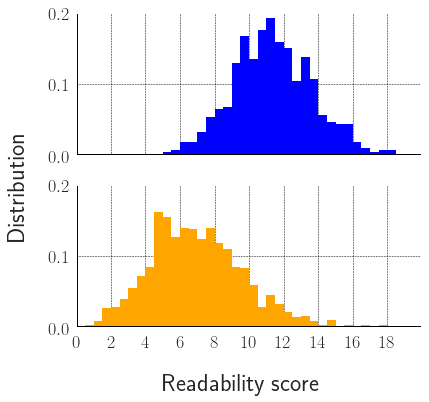

In [12]:
#X ticks

#plt.ylabel('Distribution')


xmax=20
x=np.arange(0,xmax,2) #xtics
xx=np.arange(1,xmax,0.5)

# Panel 1
ax1=plt.subplot(gs[0],facecolor='w')
ax1.set_xlim([0, xmax])
ax1.set_xticks(x)
ax1.set_ylim([0, 0.2])
ax1.set_yticks(np.arange(0,0.3,0.1))

ax1.tick_params(labelbottom='off')  
# Customize the grid
ax1.grid(linestyle='--', linewidth='0.5', color='black',which='both')
ax1.axhline(linewidth=4, color="black")        # inc. width of x-axis and color it green
ax1.axvline(linewidth=4, color="black")

#Class 0
X=readability_experts.values
#X=reduce_X(X)

#n,bins,patches=plt.hist(X,nbins,normed=1,facecolor='blue',align='mid',label='Experts')
n,bins,patches=plt.hist(X, bins=np.arange(0, 100.5, 0.5),normed=1,facecolor='blue',align='mid',label='Experts')

mu=X.mean()
var=X.var()
#legend1=plt.legend(bbox_to_anchor=(0.45, 0.95), loc=0, borderaxespad=0., fontsize=label_size)


print("Experts: Mean,variance: ({},{})".format(mu,var))


# Panel 2
ax2=plt.subplot(gs[1],facecolor='w')
ax2.set_xlim([0, xmax])
ax2.set_xticks(x)
ax2.set_ylim([0, 0.2])
ax2.set_yticks(np.arange(0,0.3,0.1))
ax2.grid(linestyle='--', linewidth='0.5', color='black',which='both')
ax2.axhline(linewidth=4, color="black")        # inc. width of x-axis and color it green
ax2.axvline(linewidth=4, color="black")


#Class 1
X=readability_non_experts.values
#X=reduce_X(X)

        
#n,bins,patches=plt.hist(X,nbins,normed=1,facecolor='orange',align='mid',label='Non experts')
n,bins,patches=plt.hist(X, bins=np.arange(0, 100.5, 0.5),normed=1,facecolor='orange',align='mid',label='Non experts')



mu=X.mean()
var=X.var()

#legend2=plt.legend(bbox_to_anchor=(0.45, 0.95), loc=0, borderaxespad=0., fontsize=label_size,frameon=1)


print("Non experts: Mean,variance:",mu,var)


plt.show()

In [13]:
#fig.facecolor="white"
fig.savefig('Readability.jpeg', dpi=300)

In [14]:
# Check a 8 filter how much data it cuts:
X=readability_experts.values

filter_val=8

ll=0
for xx in X:
    if xx < filter_val:
        ll=ll+1
    
lost_data=ll/len(X)*100
print("Data cut {}".format(lost_data))

# Check a 8 filter how much data it cuts:
X=readability_non_experts.values

filter_val=8

ll=0
for xx in X:
    if xx < filter_val:
        ll=ll+1
    
lost_data=ll/len(X)*100
print("Data cut {}".format(lost_data))

Data cut 7.290233837689134
Data cut 65.74585635359117


In [15]:
#Problem with Smog score, sometimes it gets 0?
#smog_experts=text_experts.apply(textstat.smog_index)
#smog_non_experts=text_non_experts.apply(textstat.smog_index)

text_experts.head(5)
#df_experts.head(5)
#smog_experts.head(5)
#smog_experts.loc[smog_experts == 0]
text=text_experts.loc[38]
print(text)
text="Whether or not your son has Chiari malformation is a question for your medical doctor.  If you have concerns, absolutely take them to your doctor and make sure they are addressed."
textstat.smog_index(text)


        Whether or not your son has Chiari malformation is a question for your medical doctor.  If you have concerns, absolutely take them to your doctor and make sure they are addressed.
    


0

In [17]:
textstat.flesch_kincaid_grade(text)

8.2

In [32]:
print(text)
n_sentences = textstat.sentence_count(text)
n_syllables = textstat.syllable_count(text)
n_words = len(text.split())
print("Num. sentences:",n_sentences )
print("Num. syllables:",n_syllables )
print("Num. words:",n_words )

#Average sentence length
ASL=n_words/n_sentences
ASL=textstat.avg_sentence_length(text)
ASW=n_syllables/n_words
ASW=textstat.avg_syllables_per_word(text)
grade=(0.39*ASL)+(11.8*ASW)-15.59
#ASL = self.avg_sentence_length(text)
#ASW = self.avg_syllables_per_word(text)
FKRA = float(0.39 * ASL) + float(11.8 * ASW) - 15.59
grade=round(FKRA, 1)


print("Flesch Kincaid grade:",grade)

Whether or not your son has Chiari malformation is a question for your medical doctor.  If you have concerns, absolutely take them to your doctor and make sure they are addressed.
Num. sentences: 2
Num. syllables: 47.7
Num. words: 31
Flesch Kincaid grade: 8.2
